https://towardsdatascience.com/a-simple-guide-to-beautiful-visualizations-in-python-f564e6b9d392

### Visualization Packages

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import openpyxl

### Set Style and Fontsize

In [3]:
sns.set_style('darkgrid')       # darkgrid, white grid, dark, white and ticks
plt.rc('axes', titlesize=18)    # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=13)   # fontsize of the tick labels
plt.rc('ytick', labelsize=13)   # fontsize of the tick labels
plt.rc('legend', fontsize=13)   # legend fontsize
plt.rc('font', size=13)         # controls default text sizes

In [18]:
wb = openpyxl.load_workbook(filename='CBA_Data.xlsx',read_only=True)
ws = wb['Monthly']

# Read the cell values into a list of lists
data_rows = []
for row in ws['A2':'F236']:
    data_cols = []
    for cell in row:
        data_cols.append(cell.value)
    data_rows.append(data_cols)

# Transform into dataframe
import pandas as pd
df = pd.DataFrame(data_rows)
df.columns = df.iloc[0]
df = df.drop(0)

In [61]:
print(df.head(3))
df = df.astype({"Date": object, "Potline": object, "SEC": float, "CE": float, "MV": float, "ALF3": float})
df.dtypes
print(df.head(3))

0                 Date Potline           SEC         CE       MV       ALF3
1  2018-01-01 00:00:00  Sala 2  14388.937416  87.178424  4.31850  26.960231
2  2018-01-01 00:00:00  Sala 3  14732.785164  88.097810  4.31950  23.603065
3  2018-01-01 00:00:00  Sala 4  14436.391422  88.977942  4.31275  23.874716
0                 Date Potline           SEC         CE       MV       ALF3
1  2018-01-01 00:00:00  Sala 2  14388.937416  87.178424  4.31850  26.960231
2  2018-01-01 00:00:00  Sala 3  14732.785164  88.097810  4.31950  23.603065
3  2018-01-01 00:00:00  Sala 4  14436.391422  88.977942  4.31275  23.874716


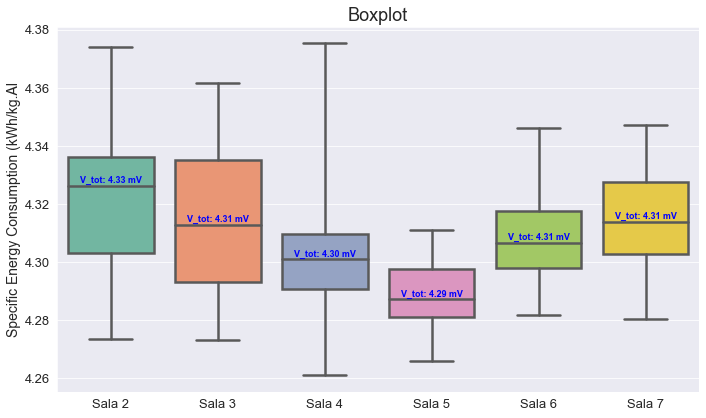

In [78]:
#df_potlines = df.groupby('Potline').values

plt.figure(figsize=(10,6), tight_layout=True)
ax = sns.boxplot(data=df, x='Potline', y='MV', palette='Set2', linewidth=2.5, whis=30)
ax.set(title='Boxplot', xlabel='', ylabel='Specific Energy Consumption (kWh/kg.Al')

# Calculate number of obs per group & median to position labels
medians = df.groupby(['Potline'])['MV'].median().values
medians_t = [str("{:.2f} mV".format(x)) for x in medians.tolist()]
medians_t = ["V_tot: " + i for i in medians_t]
nobs = df['Potline'].value_counts().values
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n: " + i for i in nobs]
 
# Add it to the plot
pos = range(len(medians))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick],
            medians[tick] + 0.001,
            medians_t[tick],
            horizontalalignment='center',
            size='x-small',
            color='blue',
            weight='bold')
 
plt.show()

### Seaborn Color Palette
https://seaborn.pydata.org/tutorial/color_palettes.html#palette-tutorial
https://seaborn.pydata.org/_images/color_palettes_22_0.png

In [9]:
#sns.color_palette('deep')
#sns.color_palette('pastel')
sns.color_palette('Set2')

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]

### Figure Size

To adjust the figure size we use plt.figure(figsize). We’ll also use tight_layout=True to clean up the padding in a plot or between subplots.

In [11]:
plt.figure(figsize=(8,4), tight_layout=True);

<Figure size 576x288 with 0 Axes>

### Plot

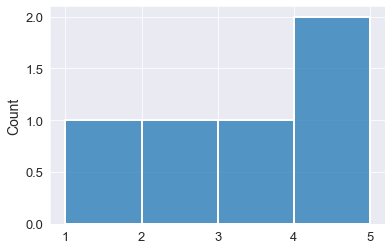

In [19]:
# matplotlib
#plt.hist([1,2,3,4,5],[1,2,3,4,5],color=sns.color_palette('Set2')[2], linewidth=2)

# seaborn
# seaborn will have either the color or palette parameters available (it depends on the plot)
ax = sns.histplot([1,2,3,4,5],palette='Set2',linewidth=2)

### Subplots

In [ ]:
#subplots
fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(12, 5), tight_layout=True)

### Label and Title
Adding labels to axes and setting title names is similar between Matplotlib plt.xlabel() and Seaborn ax.set_xlabel(), but I prefer to use the ax.set() variant in Seaborn because it takes care of most parameters in one line.

In [21]:
# matplotlib
#plt.xlabel('Nationality')
#plt.ylabel('Average Rating')
#plt.title('Barplot')
##seaborn
ax.set(title='Barplot', xlabel='Nationality', ylabel='Average Rating')

[Text(0.5, 1.0, 'Barplot'),
 Text(0.5, 3.200000000000003, 'Nationality'),
 Text(21.200000000000003, 0.5, 'Average Rating')]

## Sample

In [24]:
df_fifa21 = pd.read_csv('players_21.csv')
country = ['United States', 'Canada', 'England', 'Brazil', 'Argentina']
df_country = df_fifa21[df_fifa21['nationality'].isin(country)]

In [26]:
# Preprocessing
barplot = df_country.groupby(['nationality'], as_index=False).mean()[['nationality', 'overall']]
print(barplot)

     nationality    overall
0      Argentina  67.793803
1         Brazil  70.961669
2         Canada  62.346154
3        England  62.878338
4  United States  63.507937


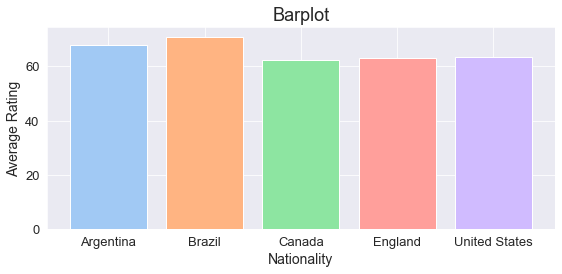

In [28]:
plt.figure(figsize=(8,4), tight_layout=True)
colors = sns.color_palette('pastel')
plt.bar(barplot['nationality'], barplot['overall'], color=colors[:5])
plt.xlabel('Nationality')
plt.ylabel('Average Rating')
plt.title('Barplot')
plt.show()

In [29]:
# preprocessing
new_df = pd.concat(
[df_country[df_country['nationality']=='Argentina'][:20], 
 df_country[df_country['nationality']=='Brazil'][:20], 
 df_country[df_country['nationality']=='England'][:20], 
 df_country[df_country['nationality']=='Canada'][:20], 
 df_country[df_country['nationality']=='United States'][:20]]
)
barplot = new_df.groupby(['nationality'], as_index=False).mean()[['nationality', 'overall']]

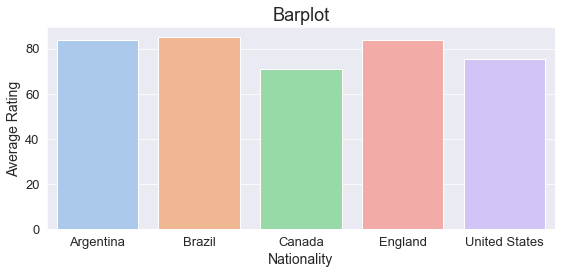

In [30]:
plt.figure(figsize=(8,4), tight_layout=True)
ax = sns.barplot(x=barplot['nationality'], y=barplot['overall'], palette='pastel', ci=None)
ax.set(title='Barplot', xlabel='Nationality', ylabel='Average Rating')
plt.show()

In [31]:
# Preprocessing
barplot = df_country[df_country['league_name'].isin(['Spain Primera Division', 'Italian Serie A', 'German 1. Bundesliga'])]
barplot = barplot.groupby(['nationality', 'league_name'], as_index=False).count()

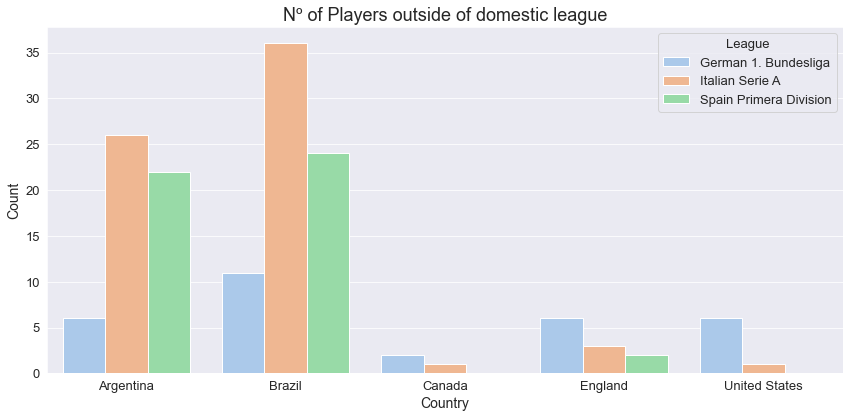

In [32]:
plt.figure(figsize=(12, 6), tight_layout=True)
ax = sns.barplot(x=barplot['nationality'], y=barplot['sofifa_id'], hue=barplot['league_name'], palette='pastel')
ax.set(title='Nº of Players outside of domestic league' ,xlabel='Country', ylabel='Count')
ax.legend(title='League', title_fontsize='13', loc='upper right')
plt.show()

In [36]:
print(df_country['height_cm'].head())

0     170
4     175
9     191
13    173
17    185
Name: height_cm, dtype: int64


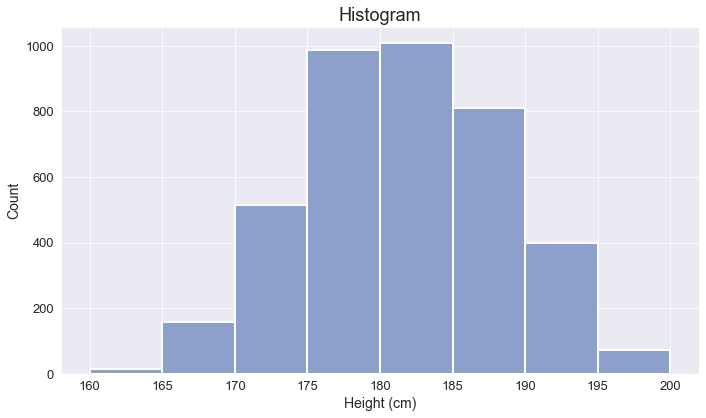

In [35]:
plt.figure(figsize=(10,6), tight_layout=True)
bins = [160, 165, 170, 175, 180, 185, 190, 195, 200]
# matplotlib
plt.hist(df_country['height_cm'], bins=bins, color=sns.color_palette('Set2')[2], linewidth=2)
plt.title('Histogram')
plt.xlabel('Height (cm)')
plt.ylabel('Count') 
# seaborn
ax = sns.histplot(data=df_country, x='height_cm', bins=bins, color=sns.color_palette('Set2')[2], linewidth=2)
ax.set(title='Histogram', xlabel='Height (cm)', ylabel='Count')
plt.show()

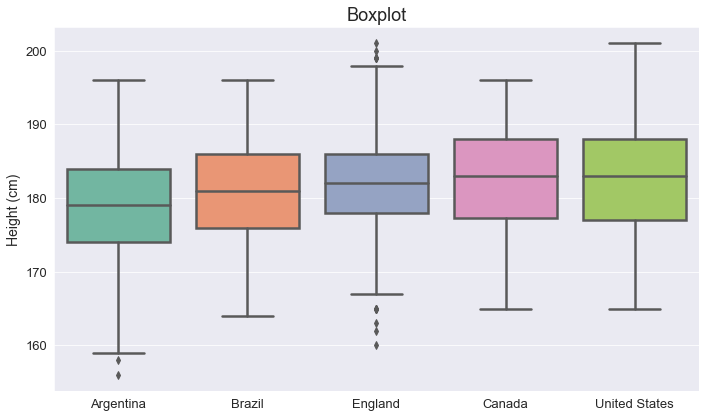

In [40]:
plt.figure(figsize=(10,6), tight_layout=True)
ax = sns.boxplot(data=df_country, x='nationality', y='height_cm', palette='Set2', linewidth=2.5)
ax.set(title='Boxplot', xlabel='', ylabel='Height (cm)')
plt.show()

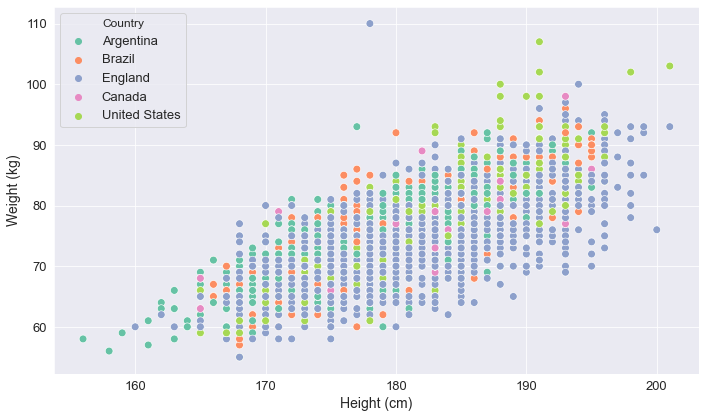

In [41]:
plt.figure(figsize=(10,6), tight_layout=True)
ax = sns.scatterplot(data=df_country, x='height_cm', y='weight_kg', hue='nationality', palette='Set2', s=60)
ax.set(xlabel='Height (cm)', ylabel='Weight (kg)')
ax.legend(title='Country', title_fontsize = 12)
plt.show()

In [43]:
# Preprocessing
piechart = df_fifa21[df_fifa21['club_name']=='Chelsea']
piechart = piechart.sort_values('value_eur', ascending=False)[['short_name', 'value_eur']]
piechart = piechart[:11]

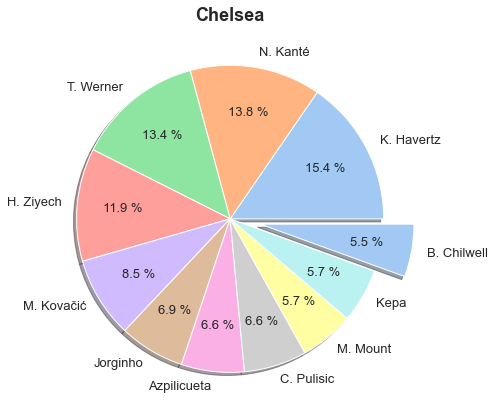

In [45]:
colors = sns.color_palette('pastel')
plt.figure(figsize=(7, 6), tight_layout=True)
explode_list = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.2]
plt.pie(piechart['value_eur'], labels=piechart['short_name'], autopct='%.1f %%', explode=explode_list, pctdistance=.7,
          colors=colors, shadow=True)
plt.title('Chelsea', weight='bold')
plt.show()

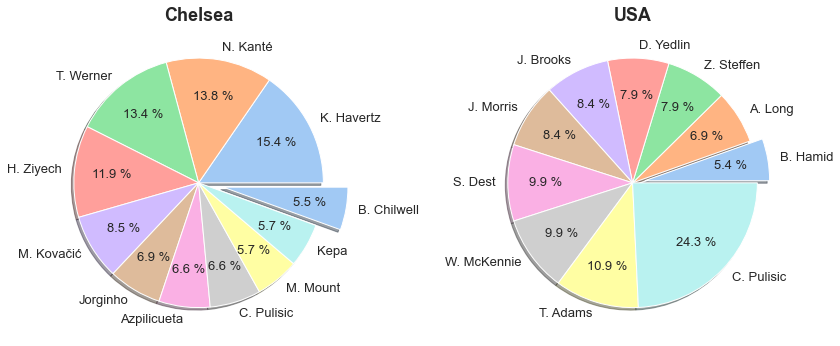

In [49]:
#subplots
fig, ax = plt.subplots(1,2, figsize=(12, 5), tight_layout=True)

# Preprocessing
piechart2 = df_fifa21[df_fifa21['nationality']=='United States']
piechart2 = piechart2[:10].sort_values('value_eur')[['short_name', 'value_eur']]


colors = sns.color_palette('pastel')
explode_list = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.2]
ax[0].pie(piechart['value_eur'], labels=piechart['short_name'], autopct='%.1f %%', explode=explode_list, pctdistance=.7,
          colors=colors, shadow=True)
ax[0].set_title('Chelsea', weight='bold')

explode_list = [0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
ax[1].pie(piechart2['value_eur'], labels=piechart2['short_name'], autopct='%.1f %%', explode=explode_list, pctdistance=.7,
          colors=colors, shadow=True)
ax[1].set_title('USA', weight='bold')
plt.show()

In [53]:
# preprocessing
df_fifa21 = pd.read_csv('players_21.csv')
df_fifa20 = pd.read_csv('players_20.csv')
df_fifa19 = pd.read_csv('players_19.csv')
df_fifa18 = pd.read_csv('players_18.csv')
df_fifa17 = pd.read_csv('players_17.csv')
frames = [df_fifa17, df_fifa18, df_fifa19, df_fifa20, df_fifa21]
for i, frame in enumerate(frames):
    frame['year'] = 2017 + i
    
lineplot = pd.concat(frames)[['short_name', 'overall', 'year']]
list_players = ['L. Messi', 'Cristiano Ronaldo', 'K. De Bruyne', 'K. Mbappé', 'V. van Dijk']
lineplot = lineplot[lineplot['short_name'].isin(list_players)]
lineplot = lineplot.pivot(index='short_name', columns='year' ,values='overall').T
lineplot.reset_index(inplace=True)
lineplot = lineplot.set_index('year')

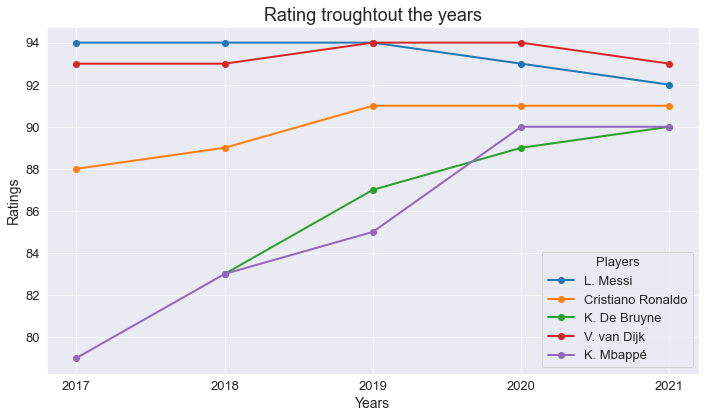

In [54]:
plt.figure(figsize=(10,6), tight_layout=True)
#plotting
plt.plot(lineplot, 'o-', linewidth=2)
#customization
plt.xticks([2017, 2018, 2019, 2020, 2021])
plt.xlabel('Years')
plt.ylabel('Ratings')
plt.title('Rating troughtout the years')
plt.legend(title='Players', title_fontsize = 13, labels=['L. Messi', 'Cristiano Ronaldo', 'K. De Bruyne', 'V. van Dijk', 'K. Mbappé'])
plt.show()

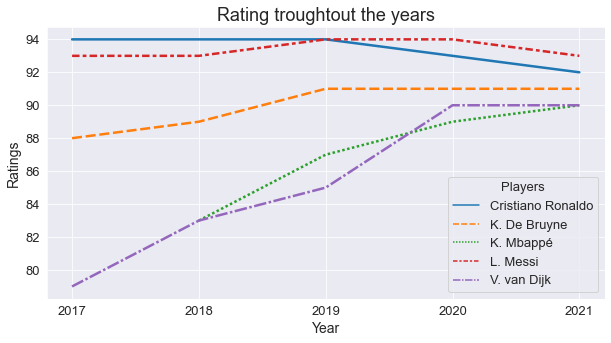

In [56]:
plt.figure(figsize=(10, 5))
ax = sns.lineplot(data=lineplot, linewidth=2.5)
ax.set(xlabel='Year', ylabel="Ratings", title="Rating troughtout the years", xticks=[2017, 2018, 2019, 2020, 2021])
ax.legend(title="Players", title_fontsize = 13)
plt.show()